## Set up
First you need to install GraphDB locally on you machine


In [ ]:
from rdflib import ConjunctiveGraph
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np
from IPython.display import display, HTML



import pandas as pd

def remoteQuery(query, endpoint):
    endpoint.setQuery(query)
    try:
        result = endpoint.queryAndConvert()
        pd.set_option("display.max_rows",None,"display.max_colwidth",6000,"display.width",6000,)
        df = pd.DataFrame(result['results']['bindings'])
        df = df.applymap(lambda x: x['value'])
        return df
        #return (result['results']['bindings'])
    except Exception as e:
        print(e)



### With a GraphDB SPARQL endpoint

The input for SPARQLWrapper is the link to the GraphDB repository where you loaded the appropriate data set, in this example the dev version of EDAM (https://raw.githubusercontent.com/edamontology/edamontology/main/EDAM_dev.owl) and a bio.agents bioschemas turtle file (https://raw.githubusercontent.com/bio-agents/content/master/datasets/bioschemas-dump.ttl) was loaded in the GrapphDB repository. 


In [ ]:
ep_bioagents = SPARQLWrapper("http://localhost:7200/repositories/Project25")
ep_bioagents.setReturnFormat(JSON)

## How many non-obsolete formats are in EDAM?

In [ ]:
q= """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?format
    ?label
WHERE
{
    ?format rdfs:subClassOf edam:format_1915   # 'subClassOf+' does not make a difference here. Is it because the inference is on?
    ;    rdfs:label ?label
    .
}
ORDER BY ASC(?format)
"""

In [ ]:
print(f"Number of non-obsolete formats in EDAM: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many EDAM formats are used to annotate bio.agents?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT
    ?format
    (COUNT(?format) as ?count)
    ?label
WHERE
{
    ?param
        rdf:type bsct:FormalParameter ;
        sc:encodingFormat ?format .
    ?format rdfs:label ?label .
}
GROUP BY ?format ?label
ORDER BY DESC(?count)
#ORDER BY ASC(?format)
"""

In [ ]:
print(f"Number of EDAM formats used in Bio.agents: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many OBSOLETE concepts are in EDAM?

In [ ]:
q= """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?concept
    ?label
WHERE
{
    ?concept
        owl:deprecated true
        #rdfs:subClassOf owl:DeprecatedClass
    ;   rdfs:label ?label
    .
}
ORDER BY ASC(?concept)
"""

In [ ]:
print(f"Number of OBSOLETE EDAM concepts: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many OBSOLETE EDAM formats are used to annotate bio.agents?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT
    ?format
    (COUNT(?format) as ?count)
    ?label
WHERE
{
    ?param
        rdf:type bsct:FormalParameter ;
        sc:encodingFormat ?format .
    ?format rdfs:label ?label .
    ?format owl:deprecated true .
}
GROUP BY ?format ?label
ORDER BY DESC(?count)
#ORDER BY ASC(?format)
"""

In [ ]:
print(f"Number of OBSOLETE EDAM formats used in Bio.agents: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many bio.agents entries are annotated with EDAM formats (as input)?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    #?format ?label
WHERE
{
    ?agent bsc:input [sc:encodingFormat ?format] .
    ?format rdfs:label ?label .   # Neeeded because the old data with URIs as literals for Data and Formats
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 8
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with EDAM formats (as input): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many bio.agents entries are annotated with EDAM formats (as output)?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    #?format ?label
WHERE
{
    ?agent bsc:output [sc:encodingFormat ?format] .
    ?format rdfs:label ?label .   # Neeeded because the old data with URIs as literals for Data and Formats
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 8
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with EDAM formats (as output): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many bio.agents entries are annotated with EDAM formats (input or output)?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    #?param ?format ?label
WHERE
{
    ?agent ?param [sc:encodingFormat ?format] .
    ?format rdfs:label ?label .   # Neeeded because the old data with URIs as literals for Data and Formats
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 8
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with EDAM formats (input or output): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many bio.agents entries are annotated with OBSOLETE EDAM formats (input or output)?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    #?param ?format ?label
WHERE
{
    ?agent ?param [sc:encodingFormat ?format] .
    ?format
        #rdfs:label ?label ;
        owl:deprecated true .
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 8
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with OBSOLETE EDAM formats (input or output): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## How many bio.agents entries are annotated with the root "Format" concept (input or output)?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent (COUNT(?agent) as ?count)
    #?param
WHERE
{
    ?agent ?param [sc:encodingFormat edam:format_1915] .
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 8
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with the root 'Format' concept (input or output): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

In https://bio.agents/meme_suite, I can actually count 11-times 'Format'.

**Looks like a bug in the Bioschemas dump🐛**

It only includes the 1st encodingFormat if there should be multiple in the given FormalParameter!

## How many bio.agents entries are annotated with the root "Data" concept (input or output)?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent (COUNT(?agent) as ?count)
    #?param
WHERE
{
    ?agent ?param [sc:additionalType edam:data_0006] .
}
GROUP BY ?agent
ORDER BY DESC(?count) ASC(?agent)
#LIMIT 8
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with the root 'Data' concept (input or output): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## Bonus: How many bio.agents entries are annotated with EDAM topics OR operations?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    #?top_or_op ?concept ?label
WHERE
{
    ?agent
        rdf:type sc:SoftwareApplication ;
        ?top_or_op ?concept .
    ?concept rdfs:label ?label .
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 16
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with topics or operations: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## Bonus: How many bio.agents entries are annotated with OBSOLETE EDAM topics OR operations?

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    #?top_or_op ?concept ?label
WHERE
{
    ?agent
        rdf:type sc:SoftwareApplication ;
        ?top_or_op ?concept .
    ?concept
        owl:deprecated true .
}
GROUP BY ?agent
ORDER BY ASC(?agent)
#LIMIT 16
"""

In [ ]:
print(f"Number of Bio.agents entries annotated with OBSOLETE topics or operations: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## List all EDAM data-format pairs in Bio.agents

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    ?formal_parameter ?data ?data_label ?format ?format_label
WHERE
{
    ?agent ?formal_parameter [sc:additionalType ?data ; sc:encodingFormat ?format] .
    ?data rdfs:label ?data_label .
    ?format rdfs:label ?format_label .
}
#GROUP BY ?agent   # Uncomment this to count how many agent records (also comment out the 2nd line of selects)
ORDER BY ASC(?agent) ASC(?data) ASC(?format)
"""

In [ ]:
print(f"Number of data-format pairs in Bio.agents: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

## List all EDAM data-format pairs in Bio.agents, that are consistent with _is_format_of_ in EDAM

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?agent
    ?formal_parameter ?data ?data_label ?format ?format_label
WHERE
{
    ?agent ?formal_parameter [sc:additionalType ?data ; sc:encodingFormat ?format] .
    ?data rdfs:label ?data_label .
    ?format
        rdfs:subClassOf [owl:onProperty edam:is_format_of ; owl:someValuesFrom ?data] ;   # Comment this out to see all
        rdfs:label ?format_label .
}
#GROUP BY ?agent   # Uncomment this to count how many agent records (also comment out the 2nd line of selects)
ORDER BY ASC(?agent) ASC(?data) ASC(?format)
"""

In [ ]:
print(f"Number of data-format pairs in Bio.agents, that are consistent with 'is format of' in EDAM: {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))

Oh no, this already shows something what might be an EDAM way of thinking from the past, with a need for re-assessment:

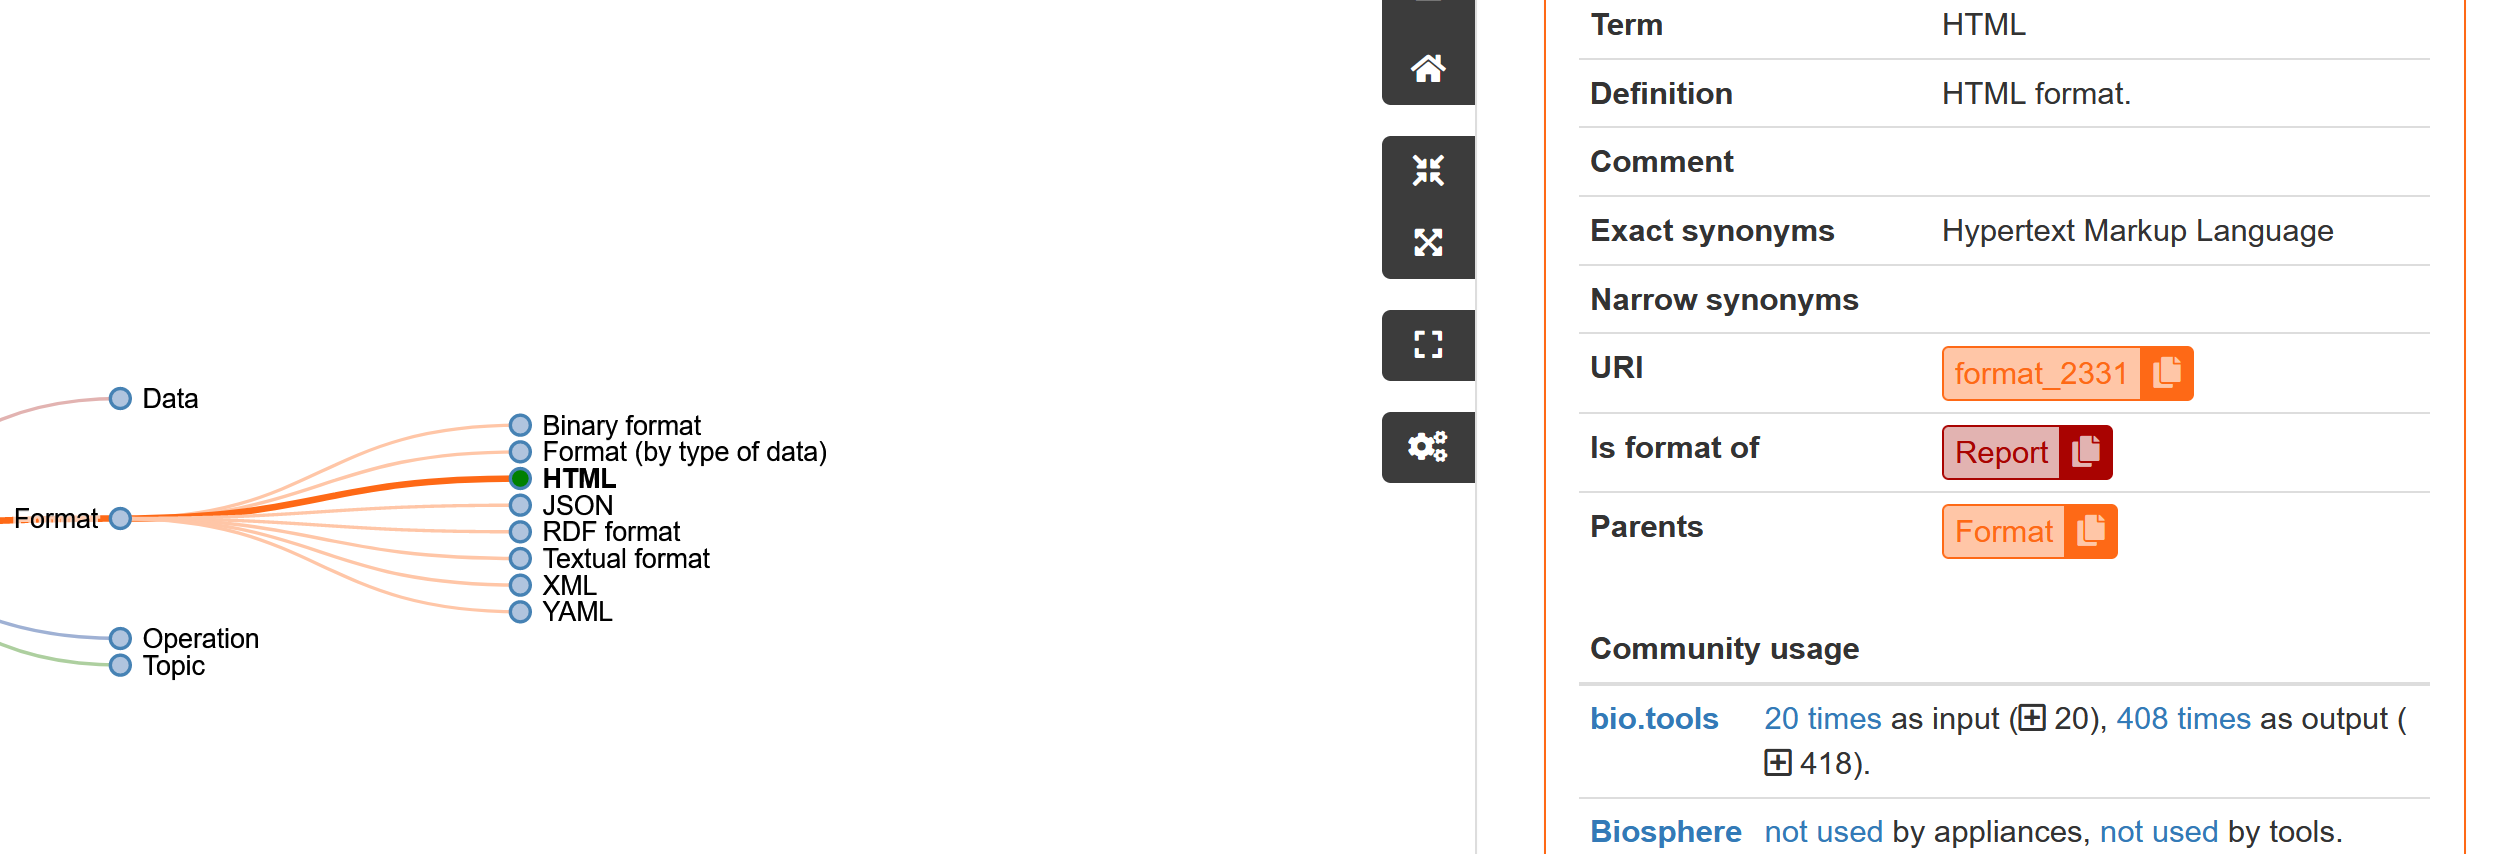

## List all EDAM formats with _is_format_of_ relations (transitive)

In [ ]:
q= """
PREFIX bioagents: <https://bio.agents/ontology/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX bsct: <http://bioschemas.org/types/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sc: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT
    ?format ?format_label
    (COUNT(?is_format_of_data) as ?count)
    #?is_format_of_data ?is_format_of_data_label
WHERE
{
    ?format
        rdfs:subClassOf [owl:onProperty edam:is_format_of ; owl:someValuesFrom ?is_format_of_data] ;
        rdfs:label ?format_label .
    ?is_format_of_data rdfs:label ?is_format_of_data_label .
} GROUP BY ?format ?format_label
ORDER BY DESC(?count) ASC(?format) ASC(?is_format_of_data)
"""

In [ ]:
print(f"Number of EDAM formats with 'is format of' relations (transitive): {len(remoteQuery(query=q, endpoint=ep_bioagents))}")
results=remoteQuery(query=q, endpoint=ep_bioagents)
display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" +
             results.to_html() +
             "</div>"))